<a href="https://colab.research.google.com/github/Pushkar360/C-30/blob/main/BML_exp_5_to_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exp 5



Accuracy: 0.0
Decision tree visualization saved as 'decision_tree.png'


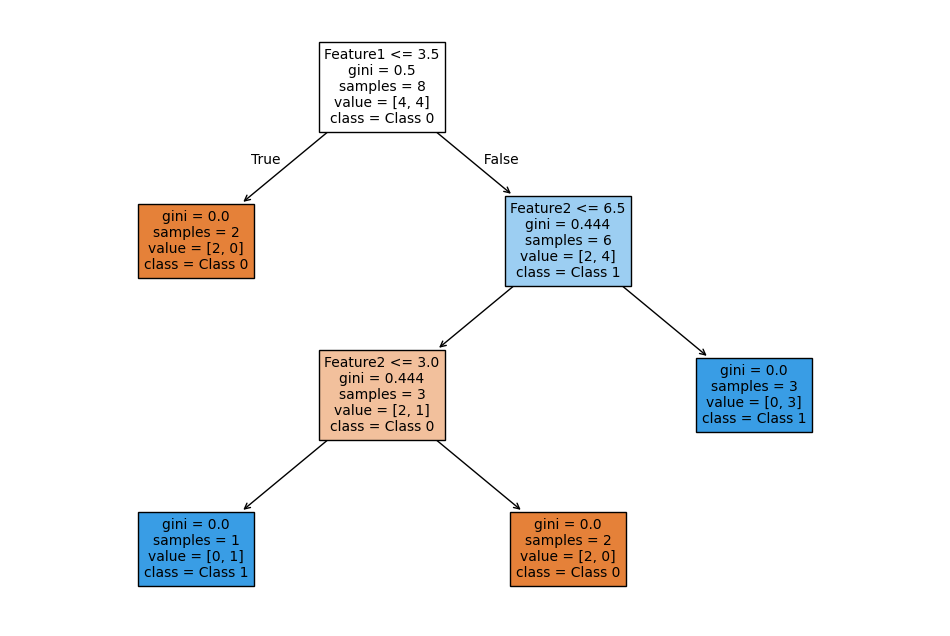

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [5, 3, 8, 7, 6, 2, 4, 9, 1, 10],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, fontsize=10)


plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
print("Decision tree visualization saved as 'decision_tree.png'")


plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/iris (1).data')
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
column_names=df.columns
print(column_names)

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


exp 7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (binary: 0 = malignant, 1 = benign)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN algorithm (manual implementation)
def knn(X_train, y_train, X_test, k=3):
    predictions = []

    # Loop through each test data point
    for test_point in X_test:
        # Calculate distances between test_point and each point in the training set
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Predict the most common label (majority voting)
        prediction = np.bincount(k_nearest_labels).argmax()
        predictions.append(prediction)

    return np.array(predictions)

# Predict using the KNN algorithm
y_pred = knn(X_train, y_train, X_test, k=3)

# Calculate accuracy (for classification task)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (binary: 0 = malignant, 1 = benign)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_pred = knn.predict(X_test)

# Calculate accuracy (for classification task)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


exp 8


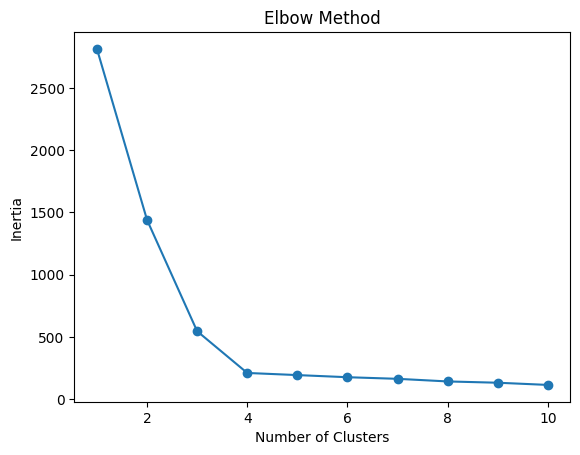

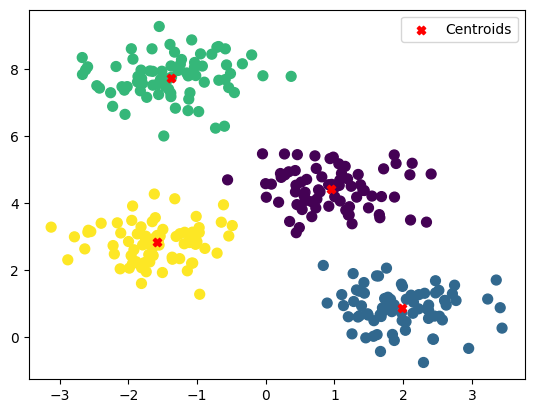

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Elbow method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# K-means with optimal clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

